In [1]:
import multiprocessing
import time

from openai import OpenAI

from tdg.config import Settings

OPENAI_API_KEY=SecretStr('**********') LLM_MODEL='gpt-4-turbo-preview'


In [2]:
nav = """You are a Pair Programming agent in a multi-agent environment.

Your role is "Navigator" - you look at the context and reason on a high level about what needs to be done to solve
a given problem.

You should NOT actually solve the problem - rather, you should provide maximally relevant context such that the
Developer and Test Designer agents can perform their jobs optimally.
"""

speed_admonishment = """
Please also note that you are running in a performance-critical environment; your generated responses should be:
    * short
    * concise
    * to the point
    * high level
    * optimally useful

You should avoid:
    * extraneous context
    * obvious information that does not need to be clarified
    * meta-commentary on the problem
    
Be as helpful and as fast as possible. Good luck!"""

msg = """A user wants to generate some code. This code will need to pass a series of unit tests.
The code to generate is:
	0. Function name: factorial
		With signature:
			def factorial(input: int) -> int:
			    '''An efficient implementation of the factorial function, e.g. X!.'''
			    ...


The user has provided the following test(s) for this context:

def factorial_test():
    assert factorial(1) == 1
    assert factorial(2) == 2 * 1
    assert factorial(3) == 3 * 2 * 1

Please reason in detail about what the user will need to do to solve the problem. Think in particular about any gotchas and edge cases that might be encountered."""


def query(system: str, client):
    start = time.time_ns()
    messages = [
        {"role": "system", "content": system},
        {"role": "user", "content": msg},
    ]
    completion = client.chat.completions.create(
        model="gpt-4-turbo",
        messages=messages,
    )
    return completion.choices[0].message.content, (time.time_ns() - start) / 1e9


def query_w_system(*args) -> tuple[tuple[str, float], tuple[str, float]]:
    client = OpenAI(api_key=Settings.from_dotenv().OPENAI_API_KEY.get_secret_value())
    basic, admonishment = args
    return query(basic, client), query(admonishment, client)

In [11]:
from tqdm import tqdm


def basic_v_admonish(n: int):
    with multiprocessing.Pool() as pool:
        result = list(
            tqdm(
                pool.imap(
                    query_w_system, [(nav, nav + speed_admonishment) for _ in range(n)]
                )
            )
        )

    return result


result = basic_v_admonish(50)

0it [00:00, ?it/s]Process SpawnPoolWorker-1:
Process SpawnPoolWorker-2:
Process SpawnPoolWorker-3:
Process SpawnPoolWorker-4:
Process SpawnPoolWorker-5:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/Cellar/python@3.11/3.11.8/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/local/Cellar/python@3.11/3.11.8/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/Cellar/python@3.11/3.11.8/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/pool.py", line 114, in worker
    task = get()
           ^^^^^
  File "/usr/local/Cellar/python@3.11/3.11.8/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/queues.p

KeyboardInterrupt: 

In [5]:
basic_out = [
    (
        'To solve the problem of implementing and ensuring the correctness of the `factorial` function, the user must tackle a few crucial steps:\n\n### 1. Understanding the Problem:\nThe factorial function, denoted as `n!`, is the product of all positive integers from 1 to `n`. It\'s commonly used in permutations, combinations, and other statistical computations. The function has a specific mathematical definition where:\n- \\(0! = 1\\)\n- For \\(n > 0\\), \\(n! = n \\times (n-1)!\\)\n\n### 2. Designing the Factorial Implementation:\nGiven the nature of the factorial function (recursive mathematical definition), the user has two primary methods to implement it in code:\n- **Iterative Method**: Using a loop to calculate the product progressively.\n- **Recursive Method**: Leveraging the function\'s own definition to call itself with the decrementing value until it reaches the base case (1!).\n\n**Iterative Approach**:\n```python\ndef factorial(input: int) -> int:\n    if input < 0:\n        raise ValueError("Factorial is not defined for negative numbers")\n    result = 1\n    for i in range(2, input + 1):\n        result *= i\n    return result\n```\n\n**Recursive Approach**:\n```python\ndef factorial(input: int) -> int:\n    if input < 0:\n        raise ValueError("Factorial is not defined for negative numbers")\n    if input in (0, 1):\n        return 1\n    return input * factorial(input - 1)\n```\n\n### 3. Addressing Edge Cases:\nIn any solid implementation, several edge cases must be considered:\n- **Negative Inputs**: Factorial is not defined for negative integers, and the implementation should handle this by raising an error.\n- **Zero Case**: The factorial of 0 is 1, according to the definition, and must return correctly.\n- **Large Inputs**: Depending on the programming environment, factorial results grow fast and can exceed standard data type limits, potentially requiring special handling or usage of larger data types (e.g., in Python `int` is arbitrary-precision).\n\n### 4. Writing Unit Tests:\nThe user must write comprehensive unit tests beyond the typical cases to ensure the implementation is robust:\n- Test with `0` to ensure \\(0! = 1\\) works.\n- Test negative numbers to ensure the implementation correctly raises errors.\n- Add tests for `1`, a small number `5`, and a larger number like `10`.\n- Consider testing very large numbers to check that the implementation handles them in terms of performance and data types appropriately (if the environment has limitations).\n- (Optional) Test for non-integer inputs if the function should strictly handle integers only to assert type error.\n\n### 5. Optimization and Best Practices:\n- **Maintainability**: Choosing between iterative or recursive implementations may depend on readability and familiarity for future code maintenance.\n- **Performance**: The iterative approach is generally preferred in environments where recursion depth is limited and can lead to stack overflow.\n- **Documentation**: Include docstrings and comments explaining the chosen implementation and handling of special cases.\n\nBy following these steps and considerations, the user can implement a robust, efficient, and correct factorial function that adequately passes the given unit tests and beyond.',
        15.953578,
    ),
    (
        "To successfully implement and ensure the robustness of the `factorial` function, the user will need to follow several steps:\n\n1. **Understanding Factorial Function Requirements:**\n   The function should take an integer `input` and return its factorial. Factorial of a non-negative integer `n` is the product of all positive integers less than or equal to `n`. It's represented as `n!`. This definition implies that the smallest input to consider is `0`, leading to `0! = 1` by convention.\n\n2. **Implement Function with Edge Cases in Mind:**\n   The provided function signature suggests that the user must handle cases where the input might challenge typical assumptions:\n   - **Negative inputs**: Factorials are undefined for negative numbers. Handling might involve returning an error or a specific indication (like `None` or raising an exception).\n   - **Non-integer inputs**: Though the type hint restricts the input to integers (`int`), it's crucial to consider what happens if the function receives a non-integer value, either by mistake or through misuse of the API. Given the strong typing provided by Python's type hints, this might not be an immediate concern unless the function is used in an untyped context.\n   - **Large numbers**: Factorials grow very fast (e.g., `5! = 120`, `10! = 3,628,800`). The implementation should efficiently handle large numbers without running into performance or overflow issues. Python's `int` type can handle large integers due to arbitrary precision but can become slow with extremely large values.\n\n3. **Choosing the Implementation Approach:**\n   There are several ways to compute the factorial:\n   - **Iterative Approach**: Loop from `1 to n` multiplying the values. This is simple and avoids the overhead of recursive calls.\n   - **Recursive Approach**: Define `factorial(n)` as `n * factorial(n-1)` with a base case where `factorial(0)=1`. While elegant, it is not as efficient as the iterative approach due to function call overhead and potential stack overflow for very large `n`.\n   - **Using Existing Libraries**: Utilize Python's `math.factorial` function, which is highly optimized. However, this might be considered cheating or not allowed based on the problem constraints.\n\n4. **Writing Comprehensive Tests:**\n    While the user provided some tests, they are basic and cover only small integers. Additional tests should include:\n   - **Testing zero** (`factorial(0)` should return `1`).\n   - **Testing a large number** to check for performance issues.\n   - **Negative input test** which checks how the function behaves with negative inputs.\n   - **Non-integer input test** if the function or environment could misinterpret types (more applicable if used in a dynamic typing setup or if the type hints are ignored in Python).\n   - **Testing potentially vulnerable scenarios like factorial of 20 or higher**, to ensure there's no overflow or performance degradation.\n\n5. **Handle Exceptions Gracefully:**\n   Incorporate error handling to manage unexpected or unsupported inputs gracefully. If deciding on a return value for error cases, ensure this is consistently applied and documented. Otherwise, raising exceptions (like `ValueError`) for unsupported inputs (negative numbers, non-integers) could be a suitable approach.\n\nBy considering these aspects, the user will be equipped to create a robust and efficient implementation of the factorial function that will pass the unit tests and handle expected and edge cases with grace.",
        21.99226,
    ),
    (
        "To solve the problem of generating code for the `factorial` function that satisfies the provided unit tests, the user should consider the following steps and considerations to ensure a robust solution:\n\n1. **Understanding Factorial**:\n   - The factorial of a non-negative integer \\( n \\) is the product of all positive integers less than or equal to \\( n \\). It's denoted as \\( n! \\).\n   - Key properties include \\( 0! = 1 \\) and \\( n! = n \\times (n-1)! \\) for \\( n > 0 \\).\n\n2. **Implementation Strategies**:\n   - **Iterative Approach**: Typically involves a loop that multiplies numbers from 1 up to the input integer.\n   - **Recursive Approach**: Uses the function itself to compute factorials by calling itself with \\( n-1 \\), multiplying the result by \\( n \\), and stopping when \\( n \\) is 0.\n\n3. **Edge Cases and Validations**:\n   - **Input Validation**: The factorial should ideally be defined for non-negative integers. What happens when the user tries to enter a negative number or a non-integer? Handling errors or raising exceptions in such cases should be planned.\n   - **The Case of Zero**: \\( 0! = 1 \\) is a special case and needs to be explicitly addressed in the function to return 1.\n   - **Large Integers**: Factorials grow very rapidly. Python can handle arbitrarily large integers, but it is still essential to consider performance implications for very large inputs.\n\n4. **Testing Considerations**:\n   - **Basic Tests**: The provided tests check for small integers (1, 2, 3). These are good to ensure basic functionality.\n   - **Edge Case Testing**: Important to test `factorial(0)` which should return 1.\n   - **Negative Input Tests**: Tests should be added to check how the function behaves when negative numbers are provided. Depending on the desired behavior, tests should assert an exception is raised or a specific return code is provided.\n   - **Large Input Tests**: Including tests for larger numbers can verify that the implementation handles big calculations without performance degradation.\n   - **Non-integer Input**: Since the signature restricts input to integers, such inputs either should never reach the function, or, if dealing with raw user input, should be filtered or validated beforehand.\n   \n5. **Optimization Considerations**:\n   - The iterative approach is often more suitable for larger numbers as it avoids the deep recursion stack of the recursive approach.\n   - Consider using Python’s in-built caching mechanisms like `functools.lru_cache` for recursive implementations to avoid redundant calculations, thereby enhancing performance. \n\nBy outlining each of these considerations, the Developer can then focus on implementing a function that correctly computes factorials considering efficiency, validity of inputs, and edge cases. Moreover, the Test Designer will be better equipped to design comprehensive test cases beyond the basic tests provided by the user hence ensuring robustness and correctness of the implementation.",
        21.767432,
    ),
    (
        "To solve the problem of generating an efficient code implementation for the `factorial` function, the user must consider several aspects and address key programming concepts:\n\n1. **Understanding Factorials**: The factorial of a non-negative integer \\( n \\), denoted as \\( n! \\), is the product of all positive integers less than or equal to \\( n \\). For instance, \\( 5! = 5 \\times 4 \\times 3 \\times 2 \\times 1 = 120 \\). The edge case scenario would be \\( 0! \\), which by definition is \\( 1 \\).\n\n2. **Function Definition**: The user needs an implementation matching the signature:\n   ```python\n   def factorial(input: int) -> int:\n   ```\n   It's crucial to validate input to ensure the function handles non-integer or negative values correctly since a factorial is only defined for non-negative integers.\n\n3. **Efficient Implementation Choices**:\n   - **Recursive Approach**: A traditional method where \\( factorial(n) = n \\times factorial(n-1) \\) and \\( factorial(0) = 1 \\). Recursive methods are straightforward but may lead to large stack usage when \\( n \\) is very large, potentially causing a stack overflow.\n   - **Iterative Approach**: Iterating from 1 up to \\( n \\), progressively calculating the product. This approach uses constant stack space, making it generally more efficient than the recursive method.\n   - **Memoization**: Storing the results of previous calculations to avoid redundant computations, especially in dynamic programming context. However, for a single-shot calculation like most factorial operations, memoization might not offer substantial benefits over a plain iterative approach.\n\n4. **Edge Cases and Gotchas**:\n   - **Zero Factorial** is \\( 1 \\). Any compliant implementation of factorial must return 1 when the input is 0.\n   - **Negative Inputs**: Factorials of negative numbers are not defined. The function should robustly handle such inputs, perhaps by raising an exception or returning a specific error value.\n   - **Large Numbers**: Factorials grow very rapidly. For very large numbers, the factorial value can exceed standard data type limits. In Python, integers are arbitrarily long, but computational time and memory use considerations still apply.\n\n5. **Unit Tests**:\n   - The given tests by the user are a good start but are limited in scope. The user must consider adding more comprehensive tests:\n     - Test with `factorial(0)`.\n     - Test with large numbers to check the performance and correct calculations.\n     - Error handling tests for negative inputs or non-integer inputs if the function needs to support such validations.\n\n6. **Performance Considerations**: Especially for large \\( n \\), consider timing the function to ensure it performs adequately. Python's built-in tools like `timeit` can be useful here.\n\n7. **Documentation and Comments**: Providing clear documentation via docstrings and inline comments can help maintain the function and clarify edge cases like how to handle \\( 0 \\) or negative numbers.\n\nThe user must balance between a clear, accurate implementation and performance efficiency, while robustly handling edge cases for a function as theoretically simple yet practically complex as calculating a factorial. After programming, it's essential to validate the implementation with thorough tests for various scenarios, ensuring that the functions not only pass provided cases but are also robust enough for other cases they might encounter in applications.\n",
        19.712705,
    ),
    (
        "To solve the problem of creating an efficient implementation of the `factorial` function that must pass the given unit tests, the user needs to focus on a few key aspects:\n\n1. **Understanding the Factorial Function:**\n   - The factorial of a non-negative integer \\( n \\), denoted as \\( n! \\), is the product of all positive integers less than or equal to \\( n \\).\n   - Specifically, \\( n! = n \\times (n-1) \\times (n-2) \\times ... \\times 1 \\), and `0!` is defined as 1.\n\n2. **Considering Algorithm Approaches:**\n   - Recursive approach: Factorial can be implemented by calling the function itself, i.e., \\( n! = n \\times (n-1)! \\). However, this might lead to performance issues with deeper stack recursion for large values of `n`.\n   - Iterative approach: This usually involves a loop to multiply all integers from 1 up to `n`, providing a more stable performance without concerns of stack overflow from recursion.\n\n3. **Edge Cases to Consider:**\n   - **Input of `0`:** The factorial of 0 is 1. This is a key base case.\n   - **Negative input:** Factorials are not defined for negative numbers. The code should handle such cases appropriately—perhaps by raising a ValueError.\n   - **Large numbers:** Factorials grow very quickly, and even with relatively small input values like `20!`, the result is a large number. Care should be taken to ensure that Python's integer type can handle this, though Python does support arbitrary-precision integers.\n\n4. **Performance Considerations:**\n   - For large integers, the performance of the factorial computation needs to be manageable. The iterative approach would likely be preferable here.\n\n5. **Implementing the Code:**\n   - The simplest form would be an iterative method using a loop from 1 to `n` and calculating the product of all these numbers.\n   - Error handling should be put in place for negative inputs.\n\n6. **Comprehensive Testing Beyond Provided Tests:**\n   - Tests should be written for the edge case of `0`.\n   - Tests for negative numbers—either to expect a specific error or to ensure they are handled gracefully.\n   - Performance tests could be beneficial to ensure the algorithm performs adequately for larger values like `100!` or even `1000!`, though practically speaking, excessively large values might not be typical for such usage.\n\n7. **Integration and Continuous Testing:**\n   - Once the method is implemented, continuous testing with the provided tests ensures that subsequent changes do not break the intended functionality.\n   - Additional tests (as described) must be implemented to fully cover the potential input space.\n\nBy taking the above considerations and steps, the user can effectively create an efficient and robust implementation of the factorial function that would pass the provided unit tests along with additional safety checks and error handling.",
        14.629086,
    ),
    (
        "To solve the problem of implementing an efficient factorial function that passes the specified tests, the user will need to consider the following key aspects:\n\n1. **Understanding the Mathematical Functionality:**\n   - The factorial of a non-negative integer \\( n \\) (denoted as \\( n! \\)) is the product of all positive integers less than or equal to \\( n \\). For example, \\( 5! = 5 \\times 4 \\times 3 \\times 2 \\times 1 = 120 \\).\n   - The factorial of \\( 0 \\) is defined as \\( 1 \\).\n\n2. **Algorithm Considerations:**\n   - The factorial function can be implemented either iteratively or recursively.\n     - **Iterative Approach:** A loop from 1 to \\( n \\), multiplying all numbers in this range.\n     - **Recursive Approach:** A function that calls itself with \\( n-1 \\) until it reaches the base case \\( n=0 \\).\n\n3. **Efficiency:**\n   - While recursion may be a straightforward approach, it could lead to performance issues for very large numbers due to stack overflow or excessive memory use. An iterative solution is typically more suited for high performance and is simpler when addressing larger values of \\( n \\).\n\n4. **Edge Cases and Defensive Programming:**\n   - **Handling of Zero:** The base case for the factorial function. If \\( n \\) is 0, the function should return 1.\n   - **Negative Inputs:** Factorial is not defined for negative integers. The function must either raise an exception (e.g., `ValueError`) or handle negative numbers explicitly if there's an extended requirement.\n   - **Data Types:** Ensure that the function only accepts integers. Handling or rejecting non-integer inputs, such as floats or strings, can improve robustness.\n\n5. **Testing Considerations:**\n   - The provided tests check the factorial function for inputs 1, 2, and 3.\n   - Add additional test cases to cover:\n     - The base case (input \\( 0 \\)).\n     - Negative input to ensure that the function raises an exception when expected.\n     - Larger numbers to verify performance and correctness under stress.\n     - Non-integer inputs if the function is supposed to reject such cases.\n\n6. **Optimization Opportunities:**\n   - Memoization could be used to cache results of the factorial computations to speed up repeated queries.\n   - The function could be written to leverage parallel computation, though this might be overengineering for most practical scenarios.\n\nBased on these considerations, the user could start implementing the function using an iterative approach which tends to be simpler for this problem and adds rigorous test cases that cover edge and stress scenarios. Also, careful attention should be paid to error handling and input validation to make the code robust in diverse conditions.",
        25.901397,
    ),
    (
        "To solve the problem of implementing and testing an efficient factorial function, the user will need to consider several aspects in designing and validating the solution:\n\n1. **Understanding the Factorial Function**: Factorial of a non-negative integer \\( n \\), denoted \\( n! \\) is the product of all positive integers less than or equal to \\( n \\). For example, \\( 5! = 5 \\times 4 \\times 3 \\times 2 \\times 1 = 120 \\).\n\n2. **Implementing the Function**:\n    - **Recursive Approach**: A common way to implement the factorial function is to use recursion. However, this method could hit Python's recursion limit for large values and is generally less efficient due to function call overheads and stack consumption.\n    - **Iterative Approach**: An iterative approach using loops is generally more memory efficient and won't hit recursion depth limits for large numbers. This is the recommended approach for an efficient implementation.\n\n3. **Edge Cases to Consider**:\n    - **Factorial of 0**: By definition, \\( 0! = 1 \\). This is a fundamental concept in combinatorics and must be correctly handled by the function.\n    - **Negative Input**: Factorial is only defined for non-negative integers. The function should potentially raise an error or handle negative inputs gracefully (e.g., return `None` or an error message).\n\n4. **Performance Considerations**:\n    - Though iterative calculations are efficient for smaller numbers, calculating factorial for very large numbers might be computationally expensive. Consider mechanisms to deal with extremely large computations or inputs.\n    - Python inherently manages large integers, but performance can degrade; hence, it's good to be aware of the operational limits.\n\n5. **Testing**: The given test cases check for factorial values of 1, 2, and 3. However, to fully validate the implementation, additional test cases are necessary:\n    - **Test for Factorial of 0**: Ensuring that the edge case of zero is correctly handled.\n    - **Test for Negative Inputs**: Ensure the function behaves as expected (e.g., error handling) when provided with invalid negative inputs.\n    - **Test with Large Numbers**: To check the function's performance and correctness under strain. Python’s handling of large integers will make this possible but may affect runtime performance.\n    - **Performance Tests**: Benchmarks to ascertain the function handles large numbers efficiently may be considered, though it can be an optional advanced step.\n\n6. **Documentation and Readability**: Ensure that the function is well-documented with comments explaining the logic, especially if choosing a less straightforward implementation approach. This aids in maintenance and understanding by other programmers.\n\nThe user needs to:\n- Choose an optimal approach (iterative recommended for efficiency).\n- Implement edge case handling, especially for zero and negative values.\n- Expand unit testing to cover all edge cases, large number inputs, and possibly benchmarking performance.\n- Verify correctness and robustness through detailed, comprehensive unit tests. \n\nBy following these guidelines, the user will be able to develop a robust and efficient factorial function with an appropriate set of tests to validate its functionality comprehensively.",
        18.429042,
    ),
    (
        "To solve the problem of implementing a `factorial` function that accurately calculates the factorial of an integer, the user must consider several key aspects:\n\n1. **Understanding Factorial Functionality**: \n   - The factorial of a non-negative integer `n`, denoted as `n!`, is the product of all positive integers less than or equal to `n`. For example, `5! = 5 * 4 * 3 * 2 * 1 = 120`.\n   - Special case: the factorial of 0 is defined as 1 (`0! = 1`).\n\n2. **Algorithm Design**:\n   - *Recursive Approach*: Factorial can be computed via a recursive function where `factorial(n) = n * factorial(n-1)` with the base case being `factorial(0) = 1`.\n   - *Iterative Approach*: An iterative solution involves initializing a result variable and multiplying it by each number up to `n`.\n   - Because the recursive stack can be deep for large values of `n` potentially leading to stack overflow, many prefer the iterative approach for its practicality. \n\n3. **Implementation Notes**:\n   - The implementation must handle a range of input values, including possibly negative numbers, which do not have a factorial and should be handled (perhaps raise an exception or return a specific value like `None` or `-1`).\n   - Factorial values grow extremely fast, so be mindful of Python’s large number handling – thankfully, Python’s `int` can handle arbitrarily large numbers, but performance might degrade as numbers become excessively large.\n\n4. **Edge Cases**:\n   - **Input of `0`**: As noted, ensure `0! = 1` is correctly returned.\n   - **Negative input**: Factorial is not defined for negative numbers. Adding a guard clause to return an appropriate value or raise an error could be necessary.\n   - **Large input values**: Testing performance and ensuring no timeout or memory overflow happens as the size of the input grows.\n\n5. **Testing**:\n   - Basic tests on expected input values (`1`, `2`, `3`, etc.) as provided, which should check if the calculation is correctly implemented.\n   - Testing above edge cases, including asserting appropriate responses or errors for negative inputs and verifying output for `0`.\n   - Performance testing might also be considered, ensuring the function handles very large inputs efficiently.\n\n6. **Scalability and Correctness**:\n   - When implemented, the function’s performance needs to align with its mathematical correctness. Various optimizations, like caching previous computed results (memoization) in recursive approaches or using loops in iterative approaches, can improve performance.\n   - Consider thread safety if the function will be used in a multi-threaded environment. \n\n7. **Documentation and Maintainability**:\n   - Adding docstrings and comments explaining the logic, especially handling edge cases, makes the code more maintainable and understandable for others. \n\nBy weighing these points, the user can effectively implement and optimize a `factorial` function that not only passes the specified tests but is also robust, efficient, and scalable.",
        21.065026,
    ),
    (
        "To appropriately navigate the development of the `factorial` function and ensure that it fulfills the specifications given in the test cases, following steps should be carefully considered and implemented:\n\n1. **Understanding the Function Requirement**:\n    - The `factorial` function should accept an integer input and return the factorial of that number. Factorial (denoted as `n!`) for a non-negative integer `n` is the product of all positive integers less than or equal to `n`.\n    - Importantly, the factorial of `0` is `1` by definition.\n\n2. **Implementation Guidelines**:\n    - The function should be implemented to first check if the input is less than `0`. Since factorial is not defined for negative numbers, the function could either raise an exception or return a specific value indicating error upon such inputs.\n    - For non-negative input, the factorial can be computed using:\n        - A **loop**: Start from `1` and multiply up until the input number. This approach should be clear and easy to understand.\n        - A **recursive method**: Factorial can be expressed as `n * factorial(n - 1)`, but recursion should be handled carefully to prevent deep recursion which could lead to a stack overflow for large `n`.\n        - Using **libraries** in some languages (for Python, one could theoretically use `math.factorial`), although in this context, the request seems to be for a manual implementation.\n\n3. **Edge Cases**:\n    - **Zero Input**: Confirm that factorial(0) returns `1`, as mathematically defined.\n    - **One Input**: Ensure factorial(1) returns `1` which is correct and conforms to the mathematical definition.\n    - **Large Inputs**: The function should be able to handle larger inputs without errors. This needs to be kept in mind especially for recursive solutions due to potential stack overflow errors.\n\n4. **Testing Considerations**:\n    - Tests should be expanded beyond just those provided to ensure robustness:\n        - Test with `0` as input.\n        - Test with large numbers to ensure that the function can handle them efficiently.\n        - Negative input testing to ensure the function handles or rejects such cases appropriately.\n    - Testing could also ensure that time performance is acceptable by timing executions on large inputs.\n\n5. **Documentation**:\n    - Comments and a docstring should explain how the function works and any assumptions made (such as negative numbers not being handled).\n\n6. **Possible Enhancements**:\n    - Depending on the further requirements, storing results of previously calculated factorials (memoization) could be added to enhance performance, especially beneficial if the function is expected to be called multiple times.\n\nBy considering these detailed steps and guidelines, the `factorial` function can be implemented efficiently and robustly, capable of passing the provided tests and well-prepared for additional edge cases and testing scenarios.",
        16.045477,
    ),
    (
        "To implement and test the `factorial` function described by the user, here are the primary steps and considerations:\n\n1. **Understanding the factorial function:**\n   The factorial of a non-negative integer `n`, denoted as `n!`, is the product of all positive integers less than or equal to `n`. The factorial function is defined as:\n   - `0! = 1` by convention,\n   - `n! = n × (n-1) × (n-2) × ... × 1` for `n > 0`.\n\n2. **Implementing the function:**\n   - The function `factorial` takes an integer input and should return an integer output, which is the factorial of the input.\n   - When implementing this function, there are two primary methods:\n     - **Iterative Method:** Using a loop to multiply all numbers up to `n`.\n     - **Recursive Method:** Using a function that calls itself with `(n-1)` until it reaches the base case `0`.\n   - **Edge Case Handling:**\n     - The primary edge case is the input `0`, which should return `1`.\n     - Factorials are defined only for non-negative integers, so the function should ideally handle or reject negative inputs gracefully.\n\n3. **Efficiency considerations:**\n   - Depending on the size of `n`, the factorial function can grow very large, very quickly (because `n!` is a product of all integers up to `n`).\n   - Consider using iterative methods over recursion in languages with limited recursion depth to avoid stack overflow issues.\n\n4. **Testing the function (`factorial_test()`):**\n   - The provided tests check the correctness of factorial values for small numbers (`1`, `2`, `3`). These are basic tests and they verify that implementation computes factorials for small integers correctly.\n   - **Additional tests to consider:**\n     - Testing the function output for `0`.\n     - Validating that the function handles or fails gracefully for negative numbers if not explicitly handled in implementation.\n     - Large number inputs should be tested to ensure that the implementation scales and performs under larger loads, if practical within the language's or environment's limitations.\n     - Testing boundary conditions and potential overflow scenarios if relevant to the environment (e.g., very large integers in Python are automatically managed, but in other languages like C++, they can overflow).\n\n5. **Handling exceptions and invalid input:**\n   - The function might need error handling if negative or non-integer inputs are possible.\n   - Consider throwing an exception or returning an error message for invalid inputs.\n\n6. **Documentation and readability:**\n   - Ensure that the function includes documentation (docstrings or comments) explaining what the function does, its parameters, return type, any exceptions raised, and why certain decisions were made (e.g., why an iterative method was chosen over recursion).\n\n7. **Code optimization and refinement:**\n   - Once the basic functionality is verified by tests, consider refactoring for clarity or efficiency.\n   - Look into potential optimization options like memoization if the function will be called multiple times with the same inputs within a greater application.\n\nBy following these guidelines, the `factorial` function can be implemented effectively and verified against the provided tests as well as any additional important tests which ensure robust and reliable functionality.",
        17.175193,
    ),
]
admonish_out = [
    (
        "To solve the problem of implementing an efficient factorial function (`factorial(input: int) -> int`), the user will need to follow these steps:\n\n1. **Function Implementation**:\n   - Implement the `factorial` function using either recursion or iteration. Recursive solutions are more straightforward but risk hitting recursion limits with large inputs. Iterative solutions are generally more efficient and don't face recursion limit issues.\n   - The base case for the factorial function is 0! = 1, and this should be explicitly handled in the code to ensure correct results and avoid errors for an input of 0.\n\n2. **Handling Edge Cases**:\n   - Ensure the function correctly handles an input of 0, returning 1.\n   - Consider and handle negative inputs appropriately. Factorial is not defined for negative numbers, which can either raise an exception (e.g., `ValueError`) or return some error message/code.\n   - Validate that the function only accepts integers as this is a function that isn't typically defined for non-integral values.\n\n3. **Performance Considerations**:\n   - Although Python handles large integers well, the factorial function grows extremely fast, and performance may become an issue with very large numbers. Optimization may be necessary, although functional correctness for large numbers is a primary concern.\n\n4. **Testing**:\n   - Extend the given unit tests to cover additional edge cases such as testing for 0, a larger number (like 10 or 20), and negative inputs.\n   - Ensure tests check for both the correct values and the handling of invalid inputs (e.g., negative numbers, non-integer types).\n   - Verify the efficiency and correctness of the factorial function through these tests.\n\n5. **Documentation and Code Quality**:\n   - Comment the code sufficiently, explaining the logic, especially if choosing a less straight-forward method for computational reasons.\n   - The function should adhere to Python's naming and styling conventions to maintain readability and maintainability.\n\nBy carefully implementing the function considering the above points and rigorously testing it, the user can ensure a robust and efficient factorial implementation.",
        14.260673,
    ),
    (
        "To successfully generate the `factorial` function and pass the provided unit tests, here are the key considerations:\n\n1. **Understanding the factorial function**: The factorial of a non-negative integer \\( n \\), denoted as \\( n! \\), is the product of all positive integers less than or equal to \\( n \\). Factorial of 0 is defined to be 1.\n\n2. **Implementation choice**: The user can implement the factorial function either iteratively or recursively:\n   - An **iterative approach** involves using a loop to compute the factorial.\n   - A **recursive approach** involves the function calling itself with decremented values until it reaches the base case.\n\n3. **Handling base case and edge cases**:\n   - The function must handle a base case (usually \\( n = 0 \\)) where it should return 1, as 0! = 1.\n   - It should correctly compute factorial for positive integers.\n   - Consider edge cases such as negative inputs. Factorial is not defined for negative numbers, so the function might raise an exception or return a special value (like `None` or `Error`) for such inputs.\n\n4. **Performance considerations**:\n   - Although factorial values grow extremely fast, performance can mainly be an issue if using recursion, due to depth of recursive calls potentially causing a stack overflow if not handled properly, especially for very large inputs.\n   - An iterative approach generally avoids this issue and might be preferable for handling larger input sizes efficiently.\n\n5. **Testing considerations**:\n   - Ensure tests cover various cases including the minimum value (0), typical small values (like those given in the tests), potentially large values, and invalid inputs (like negative numbers or non-integer types).\n   - Validate that each test correctly computes the expected factorial value.\n\n6. **Documentation and code clarity**:\n   - Include docstrings and comments explaining the implementation, especially if choosing recursion due to its somewhat more complex nature.\n   - Ensure variable names and flow are clear enough for ease of understanding and maintenance.\n\nBy ensuring all these considerations are met, the `factorial` function should be robust, efficient, and pass all provided unit tests along with additional edge cases.",
        16.473326,
    ),
    (
        "To solve the problem of generating a factorial function `factorial(input: int) -> int` that meets the given test cases, the user should consider the following key points:\n\n1. **Understanding the Functionality**: The factorial of a non-negative integer `n` is the product of all positive integers less than or equal to `n`.\n\n2. **Handling Base Cases**: \n   - The factorial of `0` should return `1`.\n   - Factorials are not defined for negative integers, so the function should handle negative inputs appropriately, either by returning a specific value (like `None` or `-1`) or by raising an exception.\n\n3. **Algorithm Choice**: \n   - A typical factorial implementation is recursive, but this can lead to stack overflow errors for very large numbers.\n   - An iterative approach might be more efficient and can avoid stack overflow issues. Loop from 1 up to the input number, multiplying the values.\n   - Another efficient method could be to use a memoization technique if the function will be called repeatedly, to store previously computed values.\n\n4. **Overflow Consideration**:\n   - Given Python's handling of integers, the function is limited only by available memory, but in other languages or contexts, integers can overflow. For a production-level function in such languages, consideration of how to handle large values should be given.\n   \n5. **Edge Cases**:\n   - Ensure that the implementation correctly handles the smallest factorial, `0! = 1`.\n   - Check behavior for `1!` to ensure it also returns `1`.\n   - Consider whether to handle or flag improper inputs such as non-integer values or floating-point numbers.\n   \n6. **Testing**:\n   - Write additional test cases to cover the edge cases including tests for `0!`, negative numbers, and potentially very large numbers to check for performance and correctness.\n   - Ensure the existing tests are comprehensive enough to cover typical usage scenarios.\n\n7. **Documentation**:\n   - Document the function to explain that it only takes non-negative integers. Mention any exceptions it might throw for invalid input to avoid confusion for other developers or users.\n\nFollowing these guidelines will help the user create a robust, efficient factorial function that meets the requirements and passes the set tests effectively.",
        11.503393,
    ),
    (
        "To solve the problem of creating an efficient implementation of a factorial function capable of passing the provided unit tests, the user must consider several key aspects:\n\n1. **Understanding Factorial**:\n   - Factorial, denoted as n!, represents the product of all positive integers less than or equal to `n`. Key to implement is the understanding that `0!` is `1`.\n\n2. **Programmatic Approach**:\n   - **Iterative**: Typically, an iterative approach involves initializing a result variable to 1, then multiplying it by each integer up to `n`.\n   - **Recursive**: A recursive approach involves the function calling itself with `n-1` until it reaches the base case. It must carefully handle the base case where `n` is 1 or 0.\n\n3. **Edge Cases**:\n   - **Input of 0**: Handling factorial for 0 is crucial since 0! is 1, and this can be overlooked if not deliberately handled.\n   - **Negative Input**: Factorial is not defined for negative numbers. The function should ideally raise an exception or error for such inputs to prevent incorrect usage.\n   - **Large Input**: Consider the factorial growth rate; large numbers can result in very large outputs or potential overflow issues, especially in languages with fixed integer sizes. Handling or documenting this behavior informs users about potential limitations.\n\n4. **Testing Extensively**:\n   - While the provided tests are a start, they are quite basic. To ensure robustness, additional tests should be added:\n     - Test with input `0` to ensure it returns `1`.\n     - Test negative inputs to verify that the function either handles or rejects these appropriately.\n     - Consider boundary cases and performance checks with large numbers if the language or implementation has limitations in integer size.\n     - Optionally, testing non-integer inputs could be beneficial if the function should solely accept integers, ensuring type safety.\n\n5. **Performance Considerations**:\n   - An iterative solution is generally more performant and avoids the overhead associated with recursive calls.\n   - Implementation details such as caching or loop optimizations can add to the efficiency especially if the function extends to handle very large inputs or is part of a larger system requiring optimal performance.\n\n6. **Documentation**:\n   - Clearly document what the function does, its parameters, its return type, and any exceptions it might throw. This is not only useful for maintenance but is also crucial in a team or public API setting.\n\nThe above elements outline the critical considerations the user needs to address to implement the `factorial` function efficiently and ensure it satisfactorily passes not only the provided tests but also handles a broad spectrum of potential real-world use cases.",
        21.763196,
    ),
    (
        "To solve the problem of implementing a factorial function `factorial(input: int) -> int`, the user must focus on the following considerations:\n\n1. **Understanding Factorial**: The factorial of a non-negative integer \\( n \\) is the product of all positive integers less than or equal to \\( n \\). The factorial of 0 is defined as 1. This is often represented as \\( n! \\).\n\n2. **Coding the Function**:\n    - Handle basic cases where the input might be small (`input <= 1`).\n    - Use either a recursive or an iterative approach to compute the factorial of the number.\n        - **Recursive Approach**: May be straightforward but could lead to stack overflow with higher input values.\n        - **Iterative Approach**: More efficient in terms of space complexity and typically avoids stack overflow issues.\n\n3. **Edge Cases**:\n    - Input as 0 (`factorial(0)`) should return 1.\n    - Negative numbers should typically either raise an error (because factorial is not defined for negative numbers) or explicitly return None or an error message.\n    - Large input values to test the efficiency of the function and ensure it doesn’t timeout or exceed memory limits.\n\n4. **Performance Considerations**:\n    - A factorial function can grow very quickly (i.e., factorial values get exceedingly large), and this can impact performance and memory usage.\n    - Keep an eye on computation time, especially for large inputs.\n\n5. **Error Handling**:\n    - Add checks to ensure that the input is a non-negative integer. Provide the appropriate responses for invalid inputs.\n    \n6. **Unit Tests**:\n    - The user has provided some basic tests, but additional tests should be considered:\n        - Test with `input=0`.\n        - Test with very large numbers to check for performance and potential overflows.\n        - Consider edge cases like negative inputs.\n        - Test with boundary values around small numbers (especially numbers around 0 and 1).\n\nBy considering these steps, the user should effectively implement and validate the `factorial` function. The robustness and efficiency of the algorithm chosen and the comprehensive nature of the tests will contribute significantly to the robust implementation of the factorial function.",
        31.137821,
    ),
    (
        "To successfully create a function named `factorial` that meets the specified tests and requirements, the following steps will be crucial:\n\n1. **Function Definition and Parameters**\n   - Define the function `factorial` that takes an integer `input` as a parameter.\n\n2. **Handle Base Cases**\n   - Since the factorial of 0 is 1, ensure that the function returns 1 when the input is 0.\n   - Factorials are not defined for negative numbers; the function should either return a specific value (like 0 or `None`) or raise an exception for negative inputs.\n\n3. **Recursive or Iterative Calculation**\n   - Implement the factorial calculation. There are two general approaches:\n     - Recursive: `factorial(n) = n * factorial(n-1)` with a base case of `factorial(0) = 1`.\n     - Iterative: Use a loop to accumulate the product from 1 to `n`.\n\n4. **Optimization Concerns**\n   - Consider the choice between recursion and iteration. Recursion can lead to a stack overflow if not handled carefully (e.g., using tail recursion optimizations if supported by the language), whereas iteration typically does not have this risk.\n\n5. **Edge Cases and Testing**\n   - Ensure the function is tested against both typical cases and edge cases:\n      - Typical inputs like positive integers should return the expected factorial.\n      - Check how the function handles `0` as an edge case.\n      - Negative inputs should be addressed as per the decision (error handling or return a specific value).\n      - Large input values, depending on language and environment constraints, might lead to long computation times or overflow issues. Consider checking behavior or implementing limits if applicable.\n\n6. **Integration with Provided Tests**\n   - Ensure that the implementation passes all provided unit tests. The tests are checking correctness for the initial sequence of factorials (1!, 2!, 3!).\n   - Consider expanding the test suite to include additional cases such as zero, negative numbers, and larger numbers to ensure that the factorial calculation scales appropriately.\n\nBy following these steps and considerations, the user can effectively create a robust and efficient implementation of the factorial function that passes the given unit tests and is ready for additional testing scenarios.",
        11.379782,
    ),
    (
        "To solve the problem effectively, implementing the `factorial` function should involve these steps:\n\n1. **Understand the Problem:** The factorial function (denoted as x!) is a mathematical function that multiplies a given number, x, by every number less than it down to 1 (so, 5! = 5 × 4 × 3 × 2 × 1 = 120).\n\n2. **Handle Edge Cases:** \n   - Consider the base case of the factorial function, particularly `factorial(0)`, which by definition is 1.\n   - Ensure the function can handle negative inputs, which should ideally return an error or handle it gracefully, as factorial is not defined for negative numbers.\n\n3. **Choose an Implementation Approach:**\n   - Recursive Approach: Define the function to call itself with decremented values (`factorial(x) = x * factorial(x-1)`), with a base condition that returns 1 when `x` is 0 or 1.\n   - Iterative Approach: Use a loop to calculate the product from 1 up to the input number. This might be more efficient in terms of memory usage compared to recursion.\n\n4. **Optimize for Large Numbers:** Factorials grow very rapidly. For large values of `input`, ensure that the implementation does not cause an integer overflow or performance issues.\n\n5. **Testing Considerations:**\n   - **Unit Tests Provided:** The basic tests are provided by the user (for 1, 2, 3). Ensure these pass with any chosen implementation.\n   - **Additional Tests:** Add tests for `factorial(0)`, large numbers to check for performance or overflow issues, and negative numbers to validate error handling.\n\n6. **Documentation and Comments:** Besides the in-line comments explaining intricate parts of the code, include a docstring explaining the purpose, parameters, and what the function returns.\n\nBy including these considerations, the user can create an efficient, robust, and well-tested `factorial` function.",
        14.499103,
    ),
    (
        "To solve the problem of creating an efficient factorial function that can pass provided unit tests, the programmer needs to implement the factorial function adhering to the following requirements and considerations:\n\n1. **Algorithm Choice**: Two primary ways to implement factorial are iterative and recursive. \n   - The **iterative approach** involves using a loop to multiply numbers decrementally from the input number `n` down to 1.\n   - The **recursive approach** calls the function itself with `n-1` until it reaches the base case. Recursive factorials can be more intuitive but less efficient in terms of memory due to call stack usage.\n\n2. **Base Cases Handling**: \n   - Factorial of 0 and 1 is 1 by definition. These cases should be explicitly checked to ensure correct results and prevent unnecessary computation especially in recursive implementations.\n\n3. **Input Validation**: \n   - Only non-negative integers are valid inputs for factorial computation. The function should ideally handle cases where the input is non-integral or negative by raising exceptions or errors.\n\n4. **Efficiency Considerations**:\n   - Since factorial numbers grow very rapidly, the factorial function needs to be optimized to handle large numbers efficiently, possibly considering avoiding deep recursion which can lead to stack overflow.\n   - An approach using memoization or an iterative process can be beneficial here.\n\n5. **Testing and Edge Cases**:\n   - The existing tests cover factorial for small positive integers (1, 2, 3). Additional tests should include:\n     - Testing for `factorial(0)` which should return 1.\n     - Negative inputs, where the function should either raise an exception or handle it gracefully.\n     - Larger numbers to check for performance and correctness.\n     - Boundary conditions, like the transition from where calculations are precise to when they might overflow, or switch to scientific notation for very large values.\n\n6. **Language and Library Utilization**:\n   - Python's integers are arbitrarily large which is helpful for factorial calculations but can slow down at extremely large values.\n   - Utilize Python's exceptions for handling invalid input scenarios effectively.\n\nBy implementing the factorial function with these considerations in mind, the user can ensure their implementation is both efficient and robust. The function should compute correct values quickly even for larger numbers within the limits of Python's performance and should handle unexpected input gracefully.",
        15.462124,
    ),
    (
        "To solve the problem of creating an efficient implementation for the `factorial` function, consider the following steps and considerations:\n\n1. **Understanding Factorial**: Factorial of a non-negative integer \\( n \\) (denoted as \\( n! \\)) is the product of all positive integers less than or equal to \\( n \\). Factorial for \\( n = 0 \\) is defined as 1. It's critical to implement this correctly.\n\n2. **Implementing the Function**:\n   - Recursive Implementation: Though straightforward, this can lead to stack overflow errors for large inputs due to deep recursion.\n   - Iterative Implementation: More efficient in terms of space as it avoids recursion stack overhead. Typically involves a loop calculating the product from 1 up to the input number.\n\n3. **Handling Edge Cases**:\n   - **Input is 0**: Should return 1, as 0! is 1 by definition.\n   - **Input is Negative**: Factorial is not defined for negative numbers, so consider how to handle this (e.g., return an error or None).\n   - **Large Inputs**: Python internally handles large integers, but it’s important to consider computation time and system limitations.\n\n4. **Performance Considerations**:\n   - Given the potential for very large output sizes, ensure that the implementation handles these gracefully.\n   - For extremely large numbers, consider the practicality of the results and the time it might take to compute them.\n\n5. **Testing**:\n   - The provided tests cover factorial values for 1, 2, and 3. Consider adding tests for edge cases like 0 and negative inputs.\n   - Add tests for larger numbers to ensure performance is acceptable.\n   - Validate expected type and error handling, such as checking for correct responses to non-integer inputs.\n\nBy addressing each of these points—especially the edge cases and performance issues—a robust and efficient factorial function can be implemented. Considering both iterative and recursive approaches will help in choosing the right method based on the scenario and requirements.",
        16.327477,
    ),
    (
        "To implement the factorial function and ensure that it passes the given unit tests, the user needs to focus on creating a robust and efficient factorial function. Here are the critical steps and considerations:\n\n1. **Base Case Handling:**\n   - Ensure that the function correctly handles the base case for factorial calculations. Specifically, `factorial(0)` should return `1` because `0!` is defined to be `1`. \n\n2. **Handling Non-negative Integers:**\n   - The factorial is defined only for non-negative integers. The function should ideally check if the input is a non-negative integer and handle or raise an error for negative inputs and non-integer types.\n   \n3. **Efficient Implementation:**\n   - Consider the most efficient way to compute the factorial. Recursive implementations are straightforward but could lead to stack overflow errors with large inputs due to deep recursion. Iterative solutions are typically more suitable for factorial computations in practice, as they avoid the overhead of recursive calls.\n   \n4. **Testing Edge Cases:**\n   - The user has provided tests for `factorial(1)`, `factorial(2)`, and `factorial(3)`. Additional tests should include:\n     - `factorial(0)` to check the base case.\n     - Large numbers to verify the function's performance and correctness under stress.\n     - Negative numbers and non-integer types (if handling these cases is deemed within the function's scope) to ensure that the function behaves expectedly under erroneous input conditions.\n\n5. **Optimization Opportunities:**\n   - If performance across multiple calls to `factorial` is a concern, consider caching results using decorators like Python's `functools.lru_cache` to avoid recalculating factorials for already seen inputs.\n\n6. **Return Type:**\n   - Ensure the function consistently returns an integer value, as factorial values are always whole numbers.\n\n7. **Documentation and Code Clarity:**\n   - Although not directly specified, maintaining clear documentation (docstrings) and comments, especially outlining assumptions and any edge case considerations, will make the code more maintainable and understandable.\n\nBy addressing these points, the function will not only pass the provided unit tests but also be robust enough to handle a variety of usage scenarios.",
        14.582968,
    ),
]

In [6]:
import pandas as pd

In [9]:
df = pd.DataFrame.from_records(basic_out, columns=["response", "query_time"])
df["category"] = "basic"
_other = pd.DataFrame.from_records(admonish_out, columns=["response", "query_time"])
_other["category"] = "admonish"
df = pd.concat([df, _other])

category
admonish    Axes(0.125,0.11;0.775x0.77)
basic       Axes(0.125,0.11;0.775x0.77)
Name: query_time, dtype: object

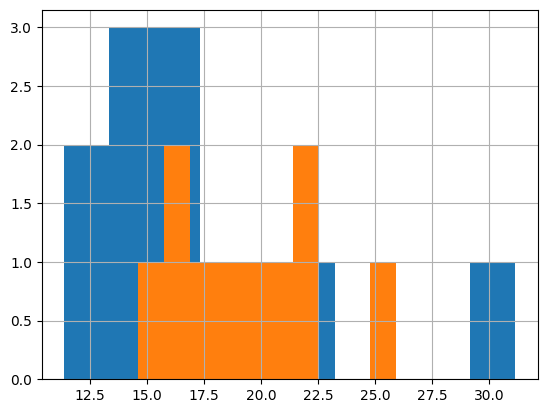

In [10]:
df.groupby("category").query_time.hist()